# Tutorlal for extracting SEDs from Galacticus output.

In [ ]:
Note that to extract an SED Galacticus must have been run with 

In [1]:
import sys
import numpy as np
from galacticus.plotting.utils import *
from galacticus.io import GalacticusHDF5
from galacticus.spectralEnergyDistributions_v2 import GalacticusSED
%matplotlib inline

In [2]:
# Load Galacticus HDF5 file and initialize GalacticusHDF5 class to load Galacticus data
#ifile = "/Users/amerson/Data/Galacticus_Out/v0.9.4/wfirstSED_singleTree_lightcone/galacticus.hdf5"
ifile = "../galacticus/data/exampleRuns/galacticus.snapshotExample.hdf5"
GH5 = GalacticusHDF5(ifile,'r')

In [3]:
# Print redshift outputs                                                                                                                                                        
print("Redshift Outputs:")
for i,z in enumerate(GH5.outputs):
    print(GH5.outputs.name[i]+": z = "+str(GH5.outputs.z[i]))

Redshift Outputs:
Output1: z = 2.0
Output2: z = 1.0
Output3: z = 0.0


In [4]:
# Initialize class to compute and extract Galacticus SEDs. Pass Galacticus HDF5 object to GalacticusSED class.
GalSED = GalacticusSED(GH5,verbose=True)

In [40]:
# EXAMPLE 1: Extract example SED at snapshot nearest to z = 1.4 with S/N=5 and using galaxy velocity dispersions to 
#            approximate the widths of Gaussian emission line profiles. Assume observer-frame.
# First step is to build the SED dataset name
z = 1.4
zStr = GH5.getRedshiftString(z)
print("We can see that the nearest HDF5 output has redshift string '"+zStr+"'")
name = "totalSED:observed:Gaussian_VelocityApprox:snr5.0:"+zStr
print(name)

We can see that the nearest HDF5 output has redshift string 'z1.0000'
totalSED:observed:Gaussian_VelocityApprox:snr5.0:z1.0000


The dataset names for the SEDs have the following nomenclature:

    <component>SED:<frame>(:<lineProfile>_<lineWidthMethod>)(:snr<SNR>):z<redshift>(:recent)(:dust<dustOptions>)
    
where:

    <component> = The component of the galaxy (disk, spheroid, or total). [Default = total]
    <frame> = The frame of the SED ('rest' or 'observed').
    <lineProfile> = If emission lines are requested, the profile to use for emission lines. [Options: Gaussian]
    <lineWidth> = If emission lines are requested, the method to compute the line width. This is either:
                'VelocityApprox', where the width is estimated from an estimate of the rotational velocity (or
                velocity dispersion) of the galaxy; of 'fixedWidth<X>', where the lines are all assigned a fixed
                width of X km/s.
    <SNR> = If provided, the continuum will be perturbed using the specified S/N ratio.
    <redshift> = The redshift of the snapshot output in which this galaxy is found (e.g 1.4000). Note that for
                lightcones this may be different to the redshift of the galaxy in the lightcone.
    <dustOptions> = If the SED has attenuated by interstellar this will consist of a string of commands 
                    describing the dust method that has been applied.
                    
If :recent is present, the luminosity will correspond to star formation that has occured in the last X Gyrs.

In [42]:
# Print wavelengths, in Angstroms, for which we have top hat filters
print(GalSED.getAvailableWavelengths(name))

[  2000.   3000.   4000.   5000.   6000.   7000.   8000.   9000.  10000.
  11500.  13500.  15500.  17500.  19500.]


In [43]:
# Set wavelength range to obtain SED over
wavelengths = np.linspace(2000,19000,1000)

In [44]:
# Build SED (use linear interpolation to get SED at specified wavelengths)
SED = GalSED.buildSED(name,wavelengths,kind='linear',fill_value='extrapolate')

In [45]:
# Get SEDs for galaxies
print SED.wavelength.shape,SED.sed.shape
print("Number of galaxies = "+str(SED.sed.shape[0]))
print SED.wavelength
print SED.sed[:,5]

(1000,) (160, 1000)
Number of galaxies = 160
[  2000.           2017.01701702   2034.03403403   2051.05105105
   2068.06806807   2085.08508509   2102.1021021    2119.11911912
   2136.13613614   2153.15315315   2170.17017017   2187.18718719
   2204.2042042    2221.22122122   2238.23823824   2255.25525526
   2272.27227227   2289.28928929   2306.30630631   2323.32332332
   2340.34034034   2357.35735736   2374.37437437   2391.39139139
   2408.40840841   2425.42542543   2442.44244244   2459.45945946
   2476.47647648   2493.49349349   2510.51051051   2527.52752753
   2544.54454454   2561.56156156   2578.57857858   2595.5955956
   2612.61261261   2629.62962963   2646.64664665   2663.66366366
   2680.68068068   2697.6976977    2714.71471471   2731.73173173
   2748.74874875   2765.76576577   2782.78278278   2799.7997998
   2816.81681682   2833.83383383   2850.85085085   2867.86786787
   2884.88488488   2901.9019019    2918.91891892   2935.93593594
   2952.95295295   2969.96996997   2986.9869869

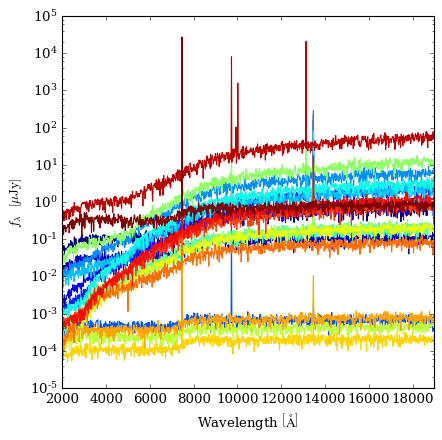

In [46]:
# Plot SEDs of first N galaxies
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
N = 20
carr = colour_array(N,cmap='jet')
for i in range(N):
    ax.plot(SED.wavelength,SED.sed[i,:],c=carr[i])
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(SED.wavelength.min(),SED.wavelength.max())
show()

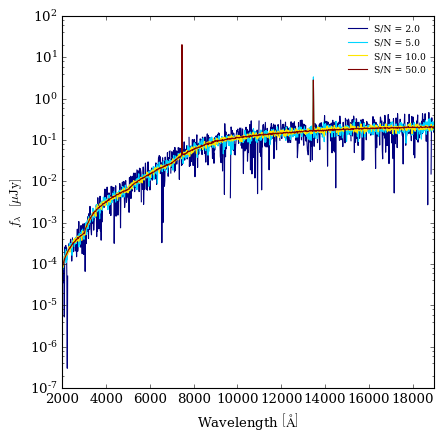

In [47]:
# EXAMPLE 2: Make plot showing different S/N ratios
z = 1.4
zStr = GH5.getRedshiftString(z)
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
snRatios = "2.0 5.0 10.0 50.0".split()
carr = colour_array(len(snRatios),cmap='jet')
for i,snr in enumerate(snRatios):        
    name = "totalSED:observed:Gaussian_VelocityApprox:snr"+snr+":"+zStr
    SED = GalSED.buildSED(name,wavelengths,kind='linear',fill_value='extrapolate')
    ax.plot(SED.wavelength,SED.sed[12,:],c=carr[i],label="S/N = "+snr)
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(SED.wavelength.min(),SED.wavelength.max())
Legend(ax,loc=0)
show()
    

In [30]:
# Other galaxy properties can be extracted using the GalacticusHDF5 class. For example:
z = 1.47
properties = GH5.availableDatasets(z)
#print properties

In [31]:
# Let's, for example, extract the lightcone redshifts of the galaxies from the output nearest to snapshot redshift 1.47.
import fnmatch
# Print all lightcone properties
print fnmatch.filter(properties,"lightcone*")

[]


In [32]:
# The lightcone redshift is stored as 'lightconeRedshift'. Read lightcone redshifts into numyp array.
galaxies = GH5.readGalaxies(z,props=["lightconeRedshift"])
print galaxies["lightconeRedshift"]

TypeError: Empty data-type

In [ ]:
# EXAMPLE 3.1: Make plot showing SEDs for random sample of galaxies at different redshifts 
#              (using single snapshot directory)
z = 1.4
zStr = GH5.getRedshiftString(z)
redshifts = GH5.readGalaxies(z,props=["lightconeRedshift"])["lightconeRedshift"]
name = "totalSED:observed:Gaussian_VelocityApprox:snr5.0:"+zStr
SED = GalSED.buildSED(name,wavelengths,kind='linear',fill_value='extrapolate')

galaxyIndices = np.arange(len(redshifts))
np.random.shuffle(galaxyIndices)

halpha = GalSED.EmissionLines.EmissionLines.getWavelength("balmerAlpha6563")
##print halpha
#halpha = 6563.0

fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')
N = 10
carr = colour_array(N,cmap='jet')
for i in range(N):
    z = redshifts[i]
    line, = ax.plot(SED.wavelength,SED.sed[i,:],c=carr[i],label="z = "+sigfig(z,4))
    ax.axvline(halpha*(1.0+z),c=line.get_color(),ls=':')
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(16000,16500)
minor_ticks(ax.xaxis)
Legend(ax,loc=0,title="H-alpha lines")
show()

In [ ]:
# EXAMPLE 3.2: Make plot showing SEDs for random sample of galaxies at different redshifts 
#              (using different snapshot directories)

halpha = GalSED.EmissionLines.EmissionLines.getWavelength("balmerAlpha6563")

fig = figure(figsize=(6,6))
ax = fig.add_subplot(111,yscale='log')

redshifts = [1.4,1.6,1.8]
for z in redshifts:
    zStr = GH5.getRedshiftString(z)
    redshifts = GH5.readGalaxies(z,props=["lightconeRedshift"])["lightconeRedshift"]
    name = "totalSED:observed:Gaussian_VelocityApprox:snr5.0:"+zStr
    SED = GalSED.buildSED(name,wavelengths,kind='linear',fill_value='extrapolate')

    galaxyIndices = np.arange(len(redshifts))
    np.random.shuffle(galaxyIndices)    
    N = 2
    for i in range(N):
        iz = redshifts[i]
        line, = ax.plot(SED.wavelength,SED.sed[i,:],label="z = "+sigfig(iz,4))
        ax.axvline(halpha*(1.0+iz),c=line.get_color(),ls=':',lw=2.0)
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("$f_{\lambda}$  $\left [{\\rm \mu Jy}\\right ]$")
ax.set_xlim(16000,17000)
minor_ticks(ax.xaxis)
Legend(ax,loc=0,title="H-alpha lines")
show()

In [ ]:
# Now find the stellar masses.
print fnmatch.filter(properties,"*MassStellar")

In [ ]:
# Stellar masses for the disk and bulge are stored separately. If the stellar mass for the total galaxy has been
# calculated it we will see a dataset "totalMassStellar". It looks like that the total stellar mass has not yet
# been computed, so we will have the compute it using the separate components.
galaxies = GH5.readGalaxies(z,props=["*MassStellar"])
# We can use wildcards to extract multiple properties
print galaxies.dtype.names
stellarMass = galaxies["diskMassStellar"] + galaxies["spheroidMassStellar"]
print stellarMass
# Note that some 'galaxies' have zero stellar mass. These entries in fact correspond to empty dark matter halos and
# so could be masked out.
mask = stellarMass > 0.0